##Preparación de datos y librerías

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("janiobachmann/bank-marketing-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/bank-marketing-dataset


In [ ]:
# Librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Estilo general
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

# Revisar los archivos descargados
print(os.listdir(path))

df = pd.read_csv(os.path.join(path, "bank.csv"))

df.head()

['bank.csv']


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


<Figure size 1200x600 with 0 Axes>

##1. Introducción

Problema de investigación: ¿Qué factores influyen en que un cliente acepte o no un depósito a plazo fijo durante una campaña de marketing bancario?

Relevancia

Las campañas de telemarketing son costosas.

Identificar patrones de éxito permite reducir costos y aumentar la tasa de conversión.

Relación con la base de datos

El dataset contiene datos demográficos, financieros y de interacción con campañas pasadas de clientes.

La variable objetivo es depósito (si el cliente aceptó abrir el depósito o no).

##2. Descripción de la base de datos

Número de registros y variables

In [ ]:
print(f"Número de registros: {df.shape[0]}")
print(f"Número de variables: {df.shape[1]}")

Número de registros: 11162
Número de variables: 17


Tipos de datos por variable

In [ ]:
print("\nTipos de datos por variable:")
print(df.dtypes.value_counts())


Tipos de datos por variable:
object    10
int64      7
Name: count, dtype: int64


Variables categóricas y numéricas

In [ ]:
categoricas = df.select_dtypes(include=['object', 'bool']).columns.tolist()
numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("🔹 Variables categóricas:")
print("\n".join([f"- {col}" for col in categoricas]))

print("\n🔸 Variables numéricas:")
print("\n".join([f"- {col}" for col in numericas]))

🔹 Variables categóricas:
- job
- marital
- education
- default
- housing
- loan
- contact
- month
- poutcome
- deposit

🔸 Variables numéricas:
- age
- balance
- day
- duration
- campaign
- pdays
- previous


Estadísticas descriptivas de las variables numéricas

In [ ]:
print("\nDescripción de variables numéricas:")
print(df.describe())


Descripción de variables numéricas:
                age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  

## 3. Análisis inicial

Valores faltantes

In [ ]:
faltantes = df.isnull().sum().sort_values(ascending=False)
print("\nConteo de valores faltantes por variable:")
print(faltantes[faltantes > 0])

#La dataset está completa, no hay que imputar nada.


Conteo de valores faltantes por variable:
Series([], dtype: int64)


La dataset está completa, no hay que imputar nada.




Conteo de valores únicos

In [ ]:
print("\nConteo de valores únicos por variable:")
print(df.nunique().sort_values(ascending=False))


Conteo de valores únicos por variable:
balance      3805
duration     1428
pdays         472
age            76
campaign       36
previous       34
day            31
month          12
job            12
poutcome        4
education       4
marital         3
contact         3
loan            2
housing         2
default         2
deposit         2
dtype: int64


variables clave

In [ ]:
variables_clave = ['age', 'balance', 'duration', 'campaign', 'previous', 'poutcome', 'deposit']

print("\nVista rápida de variables clave:")
print(df[variables_clave].head())

print("\nEstadísticas descriptivas de variables clave:")
print(df[variables_clave].describe())


Vista rápida de variables clave:
   age  balance  duration  campaign  previous poutcome deposit
0   59     2343      1042         1         0  unknown     yes
1   56       45      1467         1         0  unknown     yes
2   41     1270      1389         1         0  unknown     yes
3   55     2476       579         1         0  unknown     yes
4   54      184       673         2         0  unknown     yes

Estadísticas descriptivas de variables clave:
                age       balance      duration      campaign      previous
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000
mean      41.231948   1528.538524    371.993818      2.508421      0.832557
std       11.913369   3225.413326    347.128386      2.722077      2.292007
min       18.000000  -6847.000000      2.000000      1.000000      0.000000
25%       32.000000    122.000000    138.000000      1.000000      0.000000
50%       39.000000    550.000000    255.000000      2.000000      0.000000
75%      

##4. Visualizaciones exploratorias

Histograma de edades

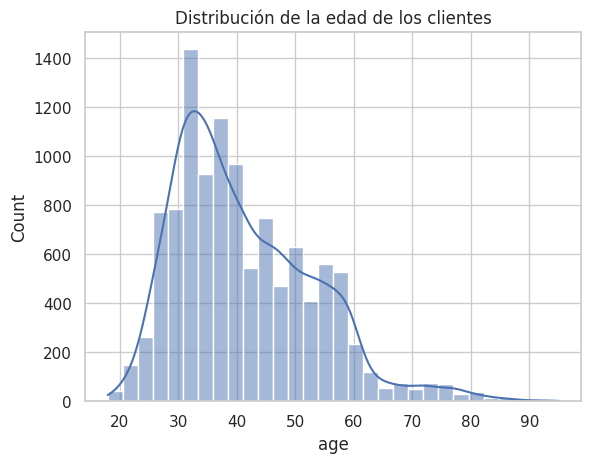

In [ ]:
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Distribución de la edad de los clientes")
plt.show()

Gráfico de barras: depósito (target)

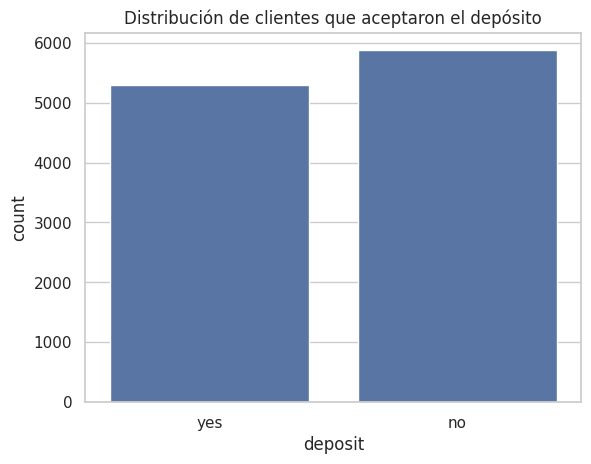

In [ ]:
sns.countplot(data=df, x='deposit')
plt.title("Distribución de clientes que aceptaron el depósito")
plt.show()

Relación entre balance y aceptación de depósito

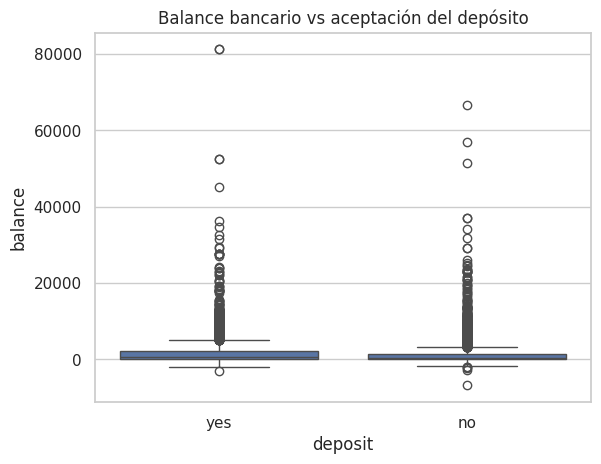

In [ ]:
sns.boxplot(data=df, x="deposit", y="balance")
plt.title("Balance bancario vs aceptación del depósito")
plt.show()

Relación entre duración de llamada y depósito

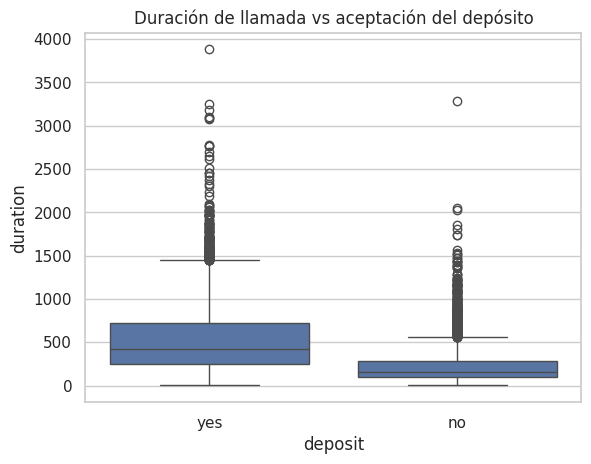

In [ ]:
sns.boxplot(data=df, x="deposit", y="duration")
plt.title("Duración de llamada vs aceptación del depósito")
plt.show()

##5. Interpretaciones iniciales


La mayoría de clientes tienen entre 30 y 50 años.

Los clientes con balances más altos muestran una mayor probabilidad de aceptar el depósito.

La duración de la llamada parece ser un factor clave en la aceptación.

El dataset está balanceado/desbalanceado respecto a la variable objetivo (depósito).

##6. Conclusiones

Se identificaron variables potencialmente influyentes: duración de la llamada, balance, edad.

La variable objetivo depósito es binaria, ideal para un modelo de clasificación.

Los siguientes pasos del proyecto incluyen: preparación de datos, selección de variables y entrenamiento de modelos predictivos.